<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Víctor Navarro Aránguiz</em><br>

</div>

# Python para Data Science: Proyecto final (Parte: Visualización)

**Fecha de Entrega**: 04 de Agosto de 2024

**Objetivos:**
  - Crear y personalizar gráficos que representen adecuadamente los datos, utilizando tanto variables originales como
creadas.

**Nombre Estudiante(s)**: `Ingrid Solís`

In [3]:
import pandas as pd
import re

archivo_csv = '/Users/desarrollo/Downloads/Crime_Reports_20240701.csv'
df = pd.read_csv(archivo_csv)

# Separar la columna 'ubicaciones' en tres nuevas columnas
df[['direccion', 'ciudad', 'estado']] = df['Location'].str.split(',', expand=True)

# Eliminar espacios en blanco en las nuevas columnas
df['direccion'] = df['direccion'].str.strip()
df['ciudad'] = df['ciudad'].str.strip()
df['estado'] = df['estado'].str.strip()

# Convertir la columna 'Date of Report' a tipo datetime
df['Date of Report'] = pd.to_datetime(df['Date of Report'])

# Separar en columnas de fecha y hora
df['Date Reporte'] = df['Date of Report'].dt.date
df['Time Reporte'] = df['Date of Report'].dt.time

# Usar str.extract para obtener las partes de fecha y hora
pattern = r'(?P<Start_Date>\d{2}/\d{2}/\d{4} \d{2}:\d{2}) - (?P<End_Date>\d{2}/\d{2}/\d{4} \d{2}:\d{2})|(?P<Start_Date_Single>\d{2}/\d{2}/\d{4} \d{2}:\d{2})|(?P<End_Date_Single>\d{2}/\d{2}/\d{4} \d{2}:\d{2})'

# Extraer las fechas de inicio y fin
extracted = df['Crime Date Time'].str.extract(pattern)

# Combinar las columnas extraídas
df['Start DateTime'] = pd.to_datetime(extracted['Start_Date'].combine_first(extracted['Start_Date_Single']))
df['End DateTime'] = pd.to_datetime(extracted['End_Date'].combine_first(extracted['End_Date_Single']))

print(df.head())

  File Number      Date of Report                      Crime Date Time  \
0  2009-01323 2009-02-21 09:53:00             02/21/2009 09:20 - 09:30   
1  2009-01324 2009-02-21 09:59:00  02/20/2009 22:30 - 02/21/2009 10:00   
2  2009-01327 2009-02-21 12:32:00  02/19/2009 21:00 - 02/21/2009 12:00   
3  2009-01331 2009-02-21 15:05:00             02/21/2009 15:00 - 15:10   
4  2009-01346 2009-02-22 05:02:00                     02/22/2009 05:02   

            Crime  Reporting Area     Neighborhood  \
0         Threats           105.0   East Cambridge   
1      Auto Theft          1109.0  North Cambridge   
2     Hit and Run          1109.0  North Cambridge   
3  Larceny (Misc)          1303.0  Strawberry Hill   
4             OUI           105.0   East Cambridge   

                            Location           direccion     ciudad estado  \
0         100 OTIS ST, Cambridge, MA         100 OTIS ST  Cambridge     MA   
1      400 RINDGE AVE, Cambridge, MA      400 RINDGE AVE  Cambridge     MA

In [11]:
# Convertir 'Date of Report' a tipo datetime
df['Date of Report'] = pd.to_datetime(df['Date of Report'])

# Agrupar por tipo de crimen y contar el número de crímenes
crime_counts = df.groupby('Crime').size().reset_index(name='Count')

# Mostrar los resultados
print(crime_counts)

                     Crime  Count
0                 Accident   2873
1              Admin Error   2874
2       Aggravated Assault   2402
3     Annoying & Accosting    148
4                    Arson    148
5               Auto Theft   1947
6         Commercial Break   1016
7       Commercial Robbery    368
8           Counterfeiting    257
9               Disorderly    494
10        Domestic Dispute     10
11      Drinking in Public    362
12                   Drugs   1086
13            Embezzlement    157
14     Extortion/Blackmail    164
15               Flim Flam   2589
16                 Forgery   6142
17                Gambling      4
18              Harassment   1534
19             Hit and Run   9150
20                Homicide     21
21              Housebreak   3846
22       Indecent Exposure    390
23              Kidnapping     34
24          Larceny (Misc)    703
25   Larceny from Building   4467
26         Larceny from MV   7398
27     Larceny from Person   3232
28  Larceny fr

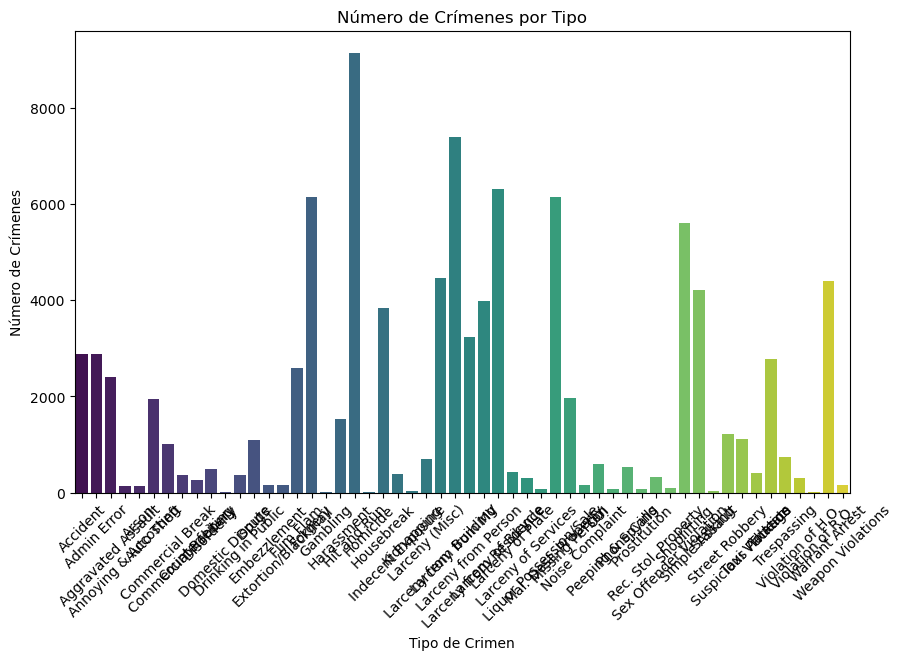

In [13]:

# Convertir 'Date of Report' a tipo datetime
df['Date of Report'] = pd.to_datetime(df['Date of Report'])

# Agrupar por tipo de crimen y contar el número de crímenes
crime_counts = df.groupby('Crime').size().reset_index(name='Count')

# Graficar el conteo de crímenes por tipo usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=crime_counts, x='Crime', y='Count', palette='viridis')
plt.title('Número de Crímenes por Tipo')
plt.xlabel('Tipo de Crimen')
plt.ylabel('Número de Crímenes')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Convertir 'Date of Report' a tipo datetime
df['Date of Report'] = pd.to_datetime(df['Date of Report'])

# Agrupar por área de reporte y contar el número de crímenes
crime_counts_by_area = df.groupby('Neighborhood').size().reset_index(name='Count')

# Mostrar los resultados
print(crime_counts_by_area)

        Neighborhood  Count
0            Agassiz   2622
1             Area 4   9535
2      Cambridgeport  14496
3     East Cambridge  12350
4          Highlands   2639
5   Inman/Harrington   5818
6                MIT   2017
7      Mid-Cambridge   9932
8    North Cambridge  10011
9            Peabody   6044
10         Riverside   9518
11   Strawberry Hill   1586
12    West Cambridge   9347


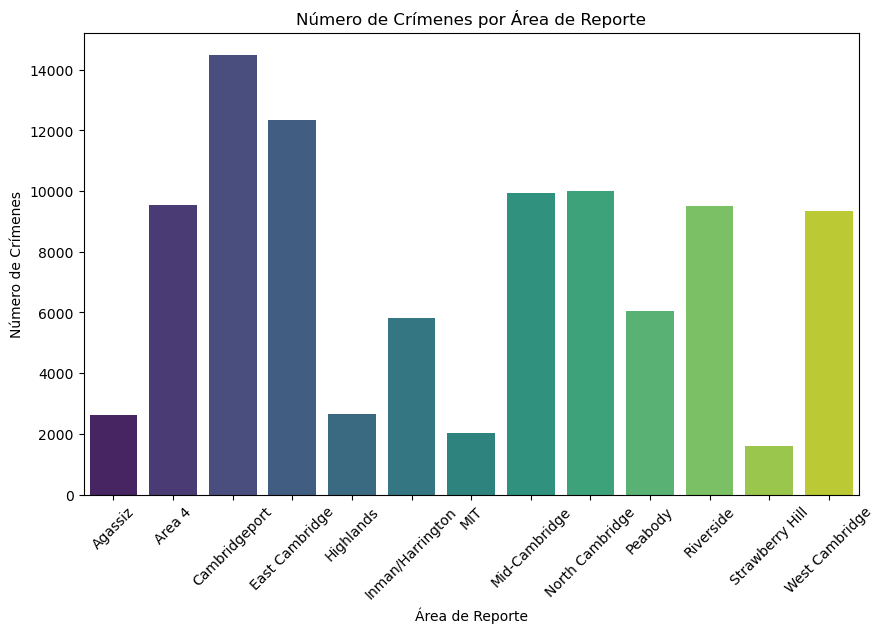

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar el conteo de crímenes por área usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=crime_counts_by_area, x='Neighborhood', y='Count', palette='viridis')
plt.title('Número de Crímenes por Área de Reporte')
plt.xlabel('Área de Reporte')
plt.ylabel('Número de Crímenes')
plt.xticks(rotation=45)
plt.show()

In [41]:
# Extraer el año de 'Date of Report'
df['Year'] = df['Date of Report'].dt.year

# Contar la cantidad de crímenes por año
crime_counts_by_year = df['Year'].value_counts().sort_index().reset_index()
crime_counts_by_year.columns = ['Year', 'Count']

# Mostrar los resultados
print(crime_counts_by_year)

    Year  Count
0   2009   6518
1   2010   6508
2   2011   6777
3   2012   6359
4   2013   6598
5   2014   6469
6   2015   6337
7   2016   5866
8   2017   5631
9   2018   5592
10  2019   5600
11  2020   5935
12  2021   5735
13  2022   6128
14  2023   7111
15  2024   2759


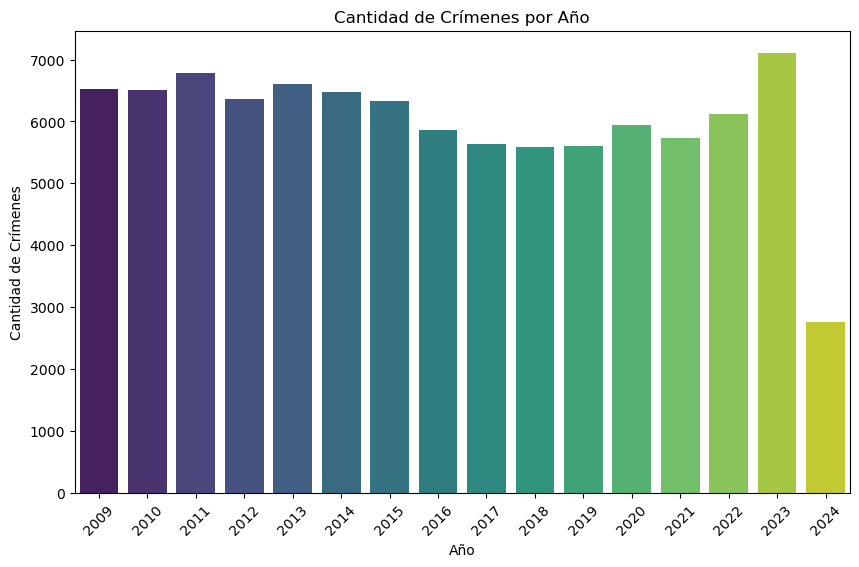

In [43]:
# Graficar la cantidad de crímenes por año
plt.figure(figsize=(10, 6))
sns.barplot(data=crime_counts_by_year, x='Year', y='Count', palette='viridis')
plt.title('Cantidad de Crímenes por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Crímenes')
plt.xticks(rotation=45)
plt.show()

    Hour  Count
0      0   1832
1      1   1638
2      2   1297
3      3    730
4      4    507
5      5    553
6      6    987
7      7   2474
8      8   4108
9      9   5184
10    10   5793
11    11   6101
12    12   6229
13    13   6495
14    14   6259
15    15   7188
16    16   7438
17    17   6835
18    18   6162
19    19   5329
20    20   4445
21    21   3638
22    22   2604
23    23   2097


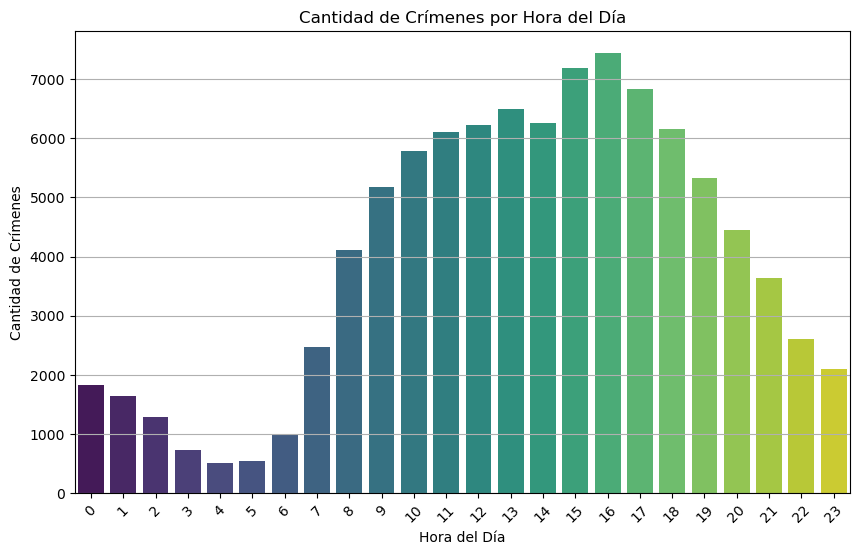

In [57]:
# Convertir 'Date of Report' a tipo datetime
df['Date of Report'] = pd.to_datetime(df['Date of Report'])

# Extraer la hora de 'Date of Report'
df['Hour'] = df['Date of Report'].dt.hour

# Contar la cantidad de crímenes por hora
crime_counts_by_hour = df['Hour'].value_counts().sort_index().reset_index()
crime_counts_by_hour.columns = ['Hour', 'Count']

# Mostrar los resultados
print(crime_counts_by_hour)

# Graficar la cantidad de crímenes por hora
plt.figure(figsize=(10, 6))
sns.barplot(data=crime_counts_by_hour, x='Hour', y='Count', palette='viridis')
plt.title('Cantidad de Crímenes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Crímenes')
plt.xticks(range(0, 24), rotation=45)  # Mostrar las horas en el eje x
plt.grid(axis='y')
plt.show()